In [6]:
import dtw

In [7]:

import get_db_data as gdd
import analyze_signal as anaz
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
reload(gdd);
reload(anaz);
from sqlalchemy.engine.result import RowProxy
from numpy.linalg import norm
import seaborn as sns
from scipy.stats import zscore

In [2]:
gdd.group_signal_sql

In [8]:
data = gdd.get_db_data()
pars = data.get_participants(True)

In [9]:
cohes ={a[1]: str(a[2])[:4] for a in pars}

In [5]:
pars

[(1001, 101, Decimal('4.25000')),
 (1001, 102, Decimal('5.00000')),
 (1001, 103, Decimal('5.25000')),
 (1003, 108, Decimal('4.00000')),
 (1003, 109, Decimal('1.50000')),
 (1004, 110, Decimal('3.50000')),
 (1004, 111, Decimal('2.75000')),
 (1004, 112, Decimal('3.75000')),
 (1006, 116, Decimal('4.00000')),
 (1006, 117, Decimal('4.75000')),
 (1006, 118, Decimal('3.25000')),
 (1007, 119, Decimal('3.25000')),
 (1007, 120, Decimal('5.00000')),
 (1007, 121, Decimal('4.75000')),
 (1008, 122, Decimal('6.00000')),
 (1008, 123, Decimal('6.00000')),
 (1008, 124, Decimal('4.75000')),
 (1009, 125, Decimal('5.50000')),
 (1009, 126, Decimal('5.00000')),
 (1009, 127, Decimal('4.00000')),
 (1010, 128, Decimal('4.75000')),
 (1010, 129, Decimal('3.75000')),
 (1010, 130, Decimal('3.25000')),
 (1011, 131, Decimal('5.00000')),
 (1011, 132, Decimal('4.25000')),
 (1011, 133, Decimal('6.00000')),
 (1012, 134, Decimal('1.00000')),
 (1012, 135, Decimal('2.00000')),
 (1012, 136, Decimal('4.25000')),
 (1013, 137, D

In [16]:
pars_tuples={}
for g, p, _ in pars:
    pars_tuples[g] = pars_tuples.get(g,[])  + [p]
pars_tuples

{1001: [101, 102, 103],
 1003: [108, 109],
 1004: [110, 111, 112],
 1006: [116, 117, 118],
 1007: [119, 120, 121],
 1008: [122, 123, 124],
 1009: [125, 126, 127],
 1010: [128, 129, 130],
 1011: [131, 132, 133],
 1012: [134, 135, 136],
 1013: [137, 138, 139],
 1014: [140, 141, 142],
 1015: [144, 145],
 1016: [146, 147, 148],
 1017: [149, 151],
 1019: [155, 156, 157],
 1020: [158, 159, 160],
 1022: [164, 165, 166],
 1023: [167, 168, 169],
 1024: [170, 171, 172],
 1025: [173, 174, 175],
 1026: [176, 177, 178],
 1027: [179, 180, 181],
 1028: [182, 183],
 1029: [185, 186, 187],
 1030: [188, 189, 190],
 1031: [191, 192, 193],
 1032: [194, 195, 196],
 1033: [200, 201, 202],
 1034: [203, 204, 205],
 1035: [206, 207, 208],
 1036: [209, 210, 211],
 1037: [212, 213, 214],
 1038: [215, 216, 217],
 1039: [218, 219, 220],
 1040: [221, 222, 223],
 1041: [224, 225, 226],
 1042: [227, 228, 229],
 1043: [230, 231, 232],
 1044: [233, 234, 235],
 1045: [236, 237, 238],
 1046: [239, 240, 241],
 1047: [242,

In [7]:
def plot_interaction(par_list,ax, cohesions, z=True):
    par_ids = [];
    for j, (par_id, par_data) in enumerate(data.get_signal_by_series_type_and_interp_type(par_list,1,3)):
        par_ids.append(str(par_id))
        y = zscore(par_data[:,1]) +j*3 if z else par_data[:,1]
        ax.plot(par_data[:,0], y)
        i = int(np.random.rand()*200)
        #ax.text(par_data[i,0],y[i],str(cohesions.get(par_id,"NA")))
    ax.legend(par_ids)


In [8]:
k=4; s=0
ptk = list(pars_tuples.keys())


In [18]:
def yield_group_signals(group_id,series_type):
    return data.get_signal_by_series_type_and_interp_type(pars_tuples[group_id],series_type,3)


In [20]:
x1,x2,x3 = list(yield_group_signals(1007,2))

In [21]:
x1

(119,
 array([[  4.     ,   0.64183],
        [  4.5    ,   0.64582],
        [  5.     ,   0.63778],
        [  5.5    ,   0.61957],
        [  6.     ,   0.61972],
        [  6.5    ,   0.62035],
        [  7.     ,   0.6054 ],
        [  7.5    ,   0.60516],
        [  8.     ,   0.61937],
        [  8.5    ,   0.62601],
        [  9.     ,   0.64744],
        [  9.5    ,   0.68796],
        [ 10.     ,   0.70923],
        [ 10.5    ,   0.69001],
        [ 11.     ,   0.68657],
        [ 11.5    ,   0.73038],
        [ 12.     ,   0.73014],
        [ 12.5    ,   0.70523],
        [ 13.     ,   0.71462],
        [ 13.5    ,   0.7034 ],
        [ 14.     ,   0.69974],
        [ 14.5    ,   0.72103],
        [ 15.     ,   0.71069],
        [ 15.5    ,   0.68064],
        [ 16.     ,   0.6831 ],
        [ 16.5    ,   0.71184],
        [ 17.     ,   0.7079 ],
        [ 17.5    ,   0.69661],
        [ 18.     ,   0.71037],
        [ 18.5    ,   0.71418],
        [ 19.     ,   0.73478],
  

In [23]:
y1, y2, y3 = [zscore(x[1][:,1]) for x in [x1,x2,x3] ]

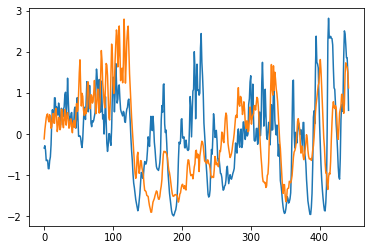

In [26]:
plt.plot(y1)
plt.plot(y2)

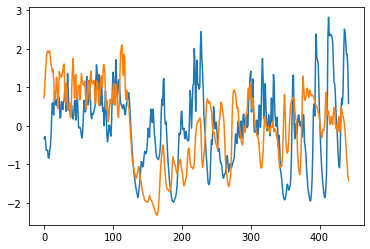

In [116]:
plt.plot(y1)
plt.plot(y3)

In [28]:
aln = dtw.dtw(y1, y2, keep_internals=True)

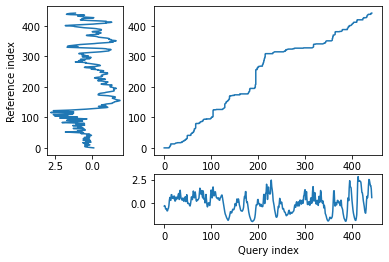

<AxesSubplot:>

In [29]:
aln.plot(type="threeway")

In [33]:
print(aln.__doc__)

The results of an alignment operation.

Objects of class DTW contain alignments computed by the [dtw()]
function. 

**Attributes:**

- ``distance`` the minimum global distance computed, *not* normalized.
- ``normalizedDistance`` distance computed, *normalized* for path
  length, if normalization is known for chosen step pattern.
- ``N,M`` query and reference length
- ``call`` the function call that created the object
- ``index1`` matched elements: indices in ``x``
- ``index2`` corresponding mapped indices in ``y``
- ``stepPattern`` the ``stepPattern`` object used for the computation
- ``jmin`` last element of reference matched, if ``open_end=True``
- ``directionMatrix`` if ``keep_internals=True``, the directions of
  steps that would be taken at each alignment pair (integers indexing
  production rules in the chosen step pattern)
- ``stepsTaken`` the list of steps taken from the beginning to the end
  of the alignment (integers indexing chosen step pattern)
- ``index1s, index2s`` same 

In [34]:
aln.N,aln.M

(443, 443)

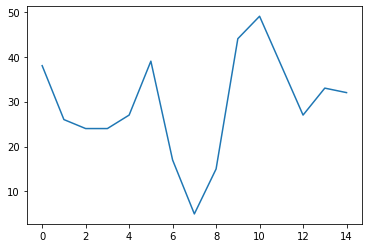

In [40]:
plt.plot(np.diff(aln.index1[::50]))

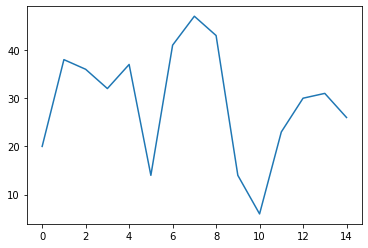

In [41]:
plt.plot(np.diff(aln.index2[::50]))

In [42]:
plt.plot(aln.index1-np.arange(443))

ValueError: operands could not be broadcast together with shapes (758,) (443,) 

In [46]:
aln.directionMatrix.shape

(443, 443)

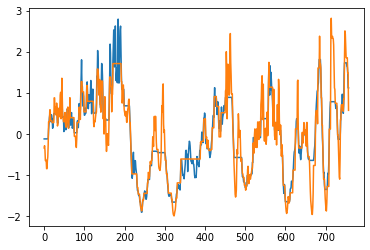

In [97]:
plt.plot(y2[aln.index2])
plt.plot(y1[aln.index1])


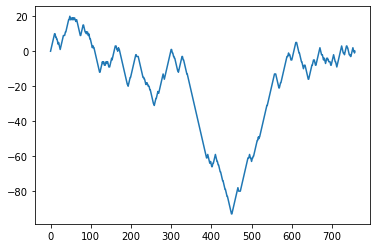

In [59]:
plt.plot(aln.index1-aln.index2)

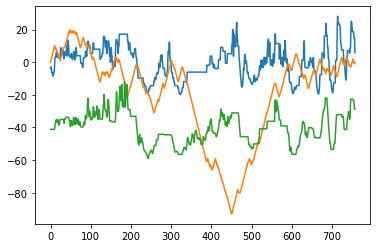

In [66]:
plt.plot(10*y1[aln.index1])

plt.plot(aln.index1-aln.index2)

plt.plot(10*y2[aln.index2]-40)


### Both advancing
I had a thought that the times when one is stopped are not representative.

However, in micro (point by point) the result is nonsense.

In [71]:
both_advancing = np.diff(aln.index1,prepend=0)*np.diff(aln.index2,prepend=0)
print(np.unique(both_advancing))
both_advancing = both_advancing.astype(bool)

index1= aln.index1[both_advancing]
index2= aln.index2[both_advancing]

[0 1]


In [73]:
np.corrcoef(y1[index1],y2[index2])

array([[1.        , 0.99213083],
       [0.99213083, 1.        ]])

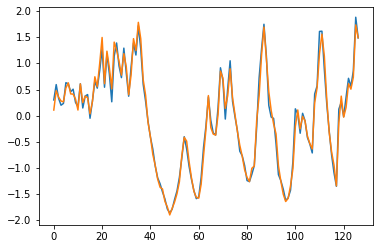

In [74]:
plt.plot(y1[index1])
plt.plot(y2[index2])

### Original correlation between signals: 0.429


In [60]:
y1 @ y2 / y1.shape[0]

0.42901219458345796

In [61]:
np.corrcoef(y1,y2)

array([[1.        , 0.42901219],
       [0.42901219, 1.        ]])

### Correlation between warped signals: 0.922


In [62]:
np.corrcoef(y1[aln.index1],y2[aln.index2])

array([[1.        , 0.92224204],
       [0.92224204, 1.        ]])

With unrestricted time-distance matching, the correlation coefficient is boosted to above 0.9.

This is interesting since in this particular example the pattern 

### restricting the shift

In [78]:
aln1 = dtw.dtw(y1,y2,window_type="slantedband",window_args={"window_size":20},keep_internals=True)

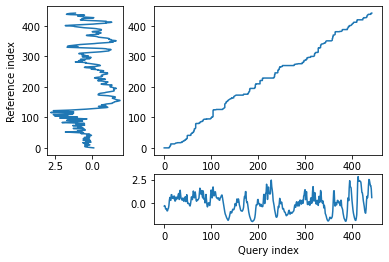

<AxesSubplot:>

In [79]:
aln1.plot(type="threeway")

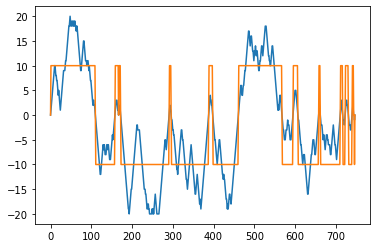

In [90]:
plt.plot(aln1.index1-aln1.index2)
plt.plot(np.sign(aln1.index1-aln1.index2)*10)


In [81]:
np.corrcoef(y1[aln1.index1],y2[aln1.index2])

array([[1.        , 0.88130332],
       [0.88130332, 1.        ]])

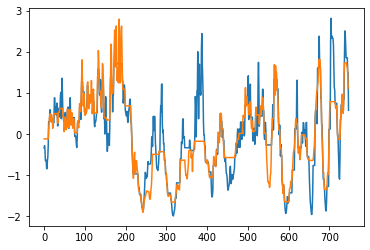

In [82]:
plt.plot(y1[aln1.index1])
plt.plot(y2[aln1.index2])

In [83]:
aln2 = dtw.dtw(y1,y2,window_type="slantedband",window_args={"window_size":10},keep_internals=True)
np.corrcoef(y1[aln2.index1],y2[aln2.index2])

array([[1.        , 0.80930717],
       [0.80930717, 1.        ]])

### looking at the third signal

In [92]:
aln3 = dtw.dtw(y1,y3,window_type="slantedband",window_args={"window_size":20},keep_internals=True)
np.corrcoef(y1[aln3.index1],y3[aln3.index2])

array([[1.        , 0.84712083],
       [0.84712083, 1.        ]])

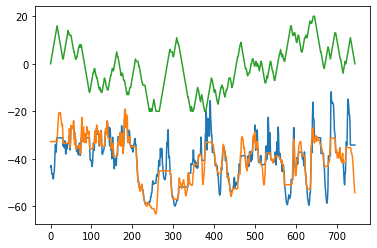

In [95]:
plt.plot(10*y1[aln3.index1]-40)

plt.plot(10*y3[aln3.index2]-40)

plt.plot(aln3.index1-aln3.index2)



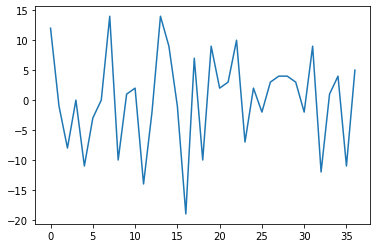

In [99]:
plt.plot(np.diff((aln3.index1-aln3.index2)[::20]))


Rundown of ideas:

* Take the correlation of the vectors after a dtw "touch-up" (allowance for small time shifts in order to imporve match) as a metric
    * pro: small shifts are acceptable in cross-subject signals therefore this better represents the synchrony
    * cons: without smoothing, arbitrary notch matching occurs? if so, spurs the correlation

* Interpret the time-shift graph
    * The dtw method is interesting if the time-shift graph can be interpreted. An obvious choice is lead/lag where the graph shows which member is currently leading
    * Coupling this lead-lag technique with the drumming might be intereseting if similar patterns occurs (leading musically is paired with leading phisiologically)
    * Similarly, coupling with EDA lead-lag
    * 3-way lead-lag patterns may also be interesting
    

* Taking a "local z-score"
    * This is a form of looking at a total displacement, composed of displacements at different time scales. The local time scale can vary from the entire segment down to a few seconds. It's also a decomposition of the variance to variances at different scales. The longer the autocorrelations, the more of the variance will reside in the longer time scales.
    * pro: might reveal different patterns of synchronization and anti-synchronization at different time scales.
    * need to develop a z-score equivalent to normalize the samples locally
 
 
* Another (currently further far-fetched) 
    

In [115]:
r1, r2 = np.random.rand(400), np.random.rand(400)

ar = dtw.dtw(r1,r2,window_type="slantedband",window_args={"window_size":0},keep_internals=True)

print(np.corrcoef(r1[ar.index1],r2[ar.index2]))
print(np.corrcoef(r1,r2))

[[1.         0.09090722]
 [0.09090722 1.        ]]
[[1.         0.09090722]
 [0.09090722 1.        ]]


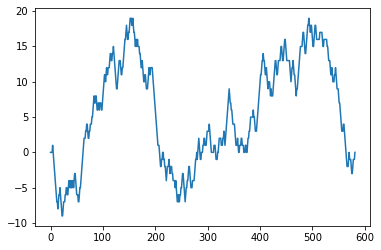

In [103]:
plt.plot(ar.index1-ar.index2)

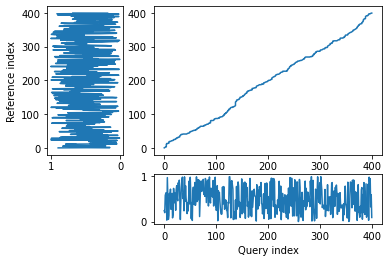

<AxesSubplot:>

In [104]:
ar.plot(type="threeway")

In [105]:
(np.diff(ar.index1-ar.index2)).count_

array([ 0,  0,  0,  1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1,  1,  0,
        1, -1, -1, -1, -1,  0,  1,  1,  0,  0,  1,  0,  1,  0, -1,  0,  1,
        1,  0, -1,  0,  1, -1,  0,  1,  0, -1,  1,  1,  0, -1, -1, -1,  0,
        0, -1,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  0, -1, -1,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  1, -1,  0,
        1,  0, -1, -1,  0,  1,  0, -1,  1,  0,  0, -1,  0,  1,  1,  1,  1,
        1,  0, -1,  1,  1, -1,  0,  1,  0,  0,  1,  1,  0, -1,  0,  1,  0,
        1, -1, -1, -1, -1, -1, -1,  0,  1,  1,  1,  1,  0,  0, -1, -1,  0,
        1,  0,  1,  1,  1,  1,  0,  1,  1, -1, -1,  0,  1,  0,  1,  1,  0,
        0, -1,  0,  1, -1, -1,  0, -1, -1,  1,  0, -1,  1, -1,  0,  0, -1,
        0, -1, -1,  0,  1, -1, -1, -1,  0,  1,  0, -1, -1,  0,  0,  1,  1,
        1, -1,  0,  1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0,  0, -1, -1, -1,  0,  1,  0,  1,  0, -1,  0, -1,  0, -1, -1,
        1,  1,  0,  0,  1